# Ejercicio de ampliación: separando monedas del fondo

En este ejercicio de ampliación vamos a ver cómo utilizar algoritmos de clustering para separar detectar en una imagen las monedas.


Como siempre el primer paso consiste en cargar las librerías necesarias. Es posible que necesites instalar la librería skimage. Para ello ejecuta el comando ```sudo pip install scikit-image```.

In [2]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

Generamos la imagen y la mostramos

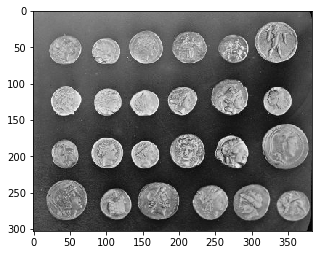

In [3]:
orig_coins = coins()
plt.figure(figsize=(5, 5))
plt.imshow(orig_coins, cmap=plt.cm.gray)
plt.show()

Aunque lo veremos con más detalle en el capítulo de visión por computador, una imagen en escala de grises (como la de las monedas) es una matriz de píxeles, donde cada píxel se representa mediante un número entre 0 y 255 (donde 0 es el color negro y 255 es el color blanco). 

In [4]:
print(orig_coins)
print(orig_coins.shape)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]
(303, 384)


Lo que vamos a ver en este ejercicio es cómo agrupar los píxeles por su cercanía. Para ello, lo primero que vamos a hacer es transformar la matriz de tamaño 303 por 384 en una lista. Notad que en este caso los puntos de nuestro dataset van a tener 1 como dimensión.

In [5]:
X = np.reshape(orig_coins, (-1, 1))

El siguiente código nos permite obtener los clústeres utilizando el clústering jerárquico utilizando el método de Ward. Daros cuenta que uno de los parámetros de dicho algoritmo es el número de clústers que queremos encontrar. El parámetro de la conectividad nos indica la estructura de los datos

In [6]:
n_clusters = 27  # number of regions
connectivity = grid_to_graph(*orig_coins.shape)
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, orig_coins.shape)

Por último mostramos la segmentación obtenida

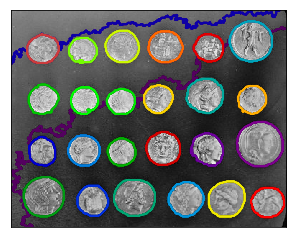

In [7]:
plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

## Ejercicio 
Utiliza los distintos métodos de clustering, tanto jerárquicos como no jerárquicos vistos en las prácticas para obtener las distintas segmentaciones de las monedas.

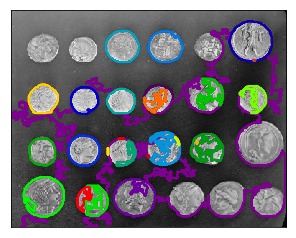

In [10]:
n_clusters = 27  # number of regions
connectivity = grid_to_graph(*orig_coins.shape)
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete',connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, orig_coins.shape)

plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

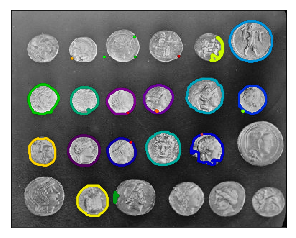

In [13]:
n_clusters = 27  # number of regions
connectivity = grid_to_graph(*orig_coins.shape)
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='average',connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, orig_coins.shape)

plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()